# Decision Tree - Binary Classification

**Modello:** Decision Tree Classifier

**Dataset:** Processed v3 (43 features, 314k samples)

**Bilanciamento:** `class_weight='balanced'` + pruning

**Vantaggi Decision Tree:**
- Massima interpretabilità
- Visualizzabile graficamente
- Nessun preprocessing
- Veloce nel training e predict

## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

print("Librerie importate!")

Librerie importate!


## 2. Caricamento Dati

In [2]:
print("Caricamento dati...\n")

X_train = pd.read_csv('../data/processed_v4_hybrid/X_train.csv')
X_test = pd.read_csv('../data/processed_v4_hybrid/X_test.csv')
y_train = pd.read_csv('../data/processed_v4_hybrid/y_train.csv')['BinaryIncidentGrade']
y_test = pd.read_csv('../data/processed_v4_hybrid/y_test.csv')['BinaryIncidentGrade']

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"\nClass distribution:")
print(y_train.value_counts())
print(f"\nImbalance ratio: {(y_train==0).sum()/(y_train==1).sum():.2f}:1")

Caricamento dati...

X_train: (304848, 43)
X_test: (149537, 43)

Class distribution:
BinaryIncidentGrade
0    152424
1    152424
Name: count, dtype: int64

Imbalance ratio: 1.00:1


## 3. Training Decision Tree

In [3]:
print("Training Decision Tree con class_weight='balanced'...\n")

model = DecisionTreeClassifier(
    max_depth=10,              # Limita profondità per evitare overfitting
    min_samples_split=100,     # Minimo sample per split
    min_samples_leaf=50,       # Minimo sample per foglia
    class_weight='balanced',   # Bilanciamento automatico
    random_state=42
)

model.fit(X_train, y_train)

print("✅ Training completato!")
print(f"\nTree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")
print(f"Number of features: {model.n_features_in_}")

Training Decision Tree con class_weight='balanced'...

✅ Training completato!

Tree depth: 10
Number of leaves: 366
Number of features: 43


## 4. Evaluation

In [4]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("="*70)
print("PERFORMANCE TEST SET - Decision Tree")
print("="*70)

print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                           target_names=['Non-TP', 'TP'], digits=4))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nPRECISION: {precision:.4f}")
print(f"RECALL:    {recall:.4f}")
print(f"F1-SCORE:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f} ⭐")

PERFORMANCE TEST SET - Decision Tree

Classification Report:
              precision    recall  f1-score   support

      Non-TP     0.9000    0.9204    0.9101    105987
          TP     0.7950    0.7511    0.7724     43550

    accuracy                         0.8711    149537
   macro avg     0.8475    0.8358    0.8413    149537
weighted avg     0.8694    0.8711    0.8700    149537


PRECISION: 0.7950
RECALL:    0.7511
F1-SCORE:  0.7724
ROC AUC:   0.9224 ⭐


## 5. Confusion Matrix

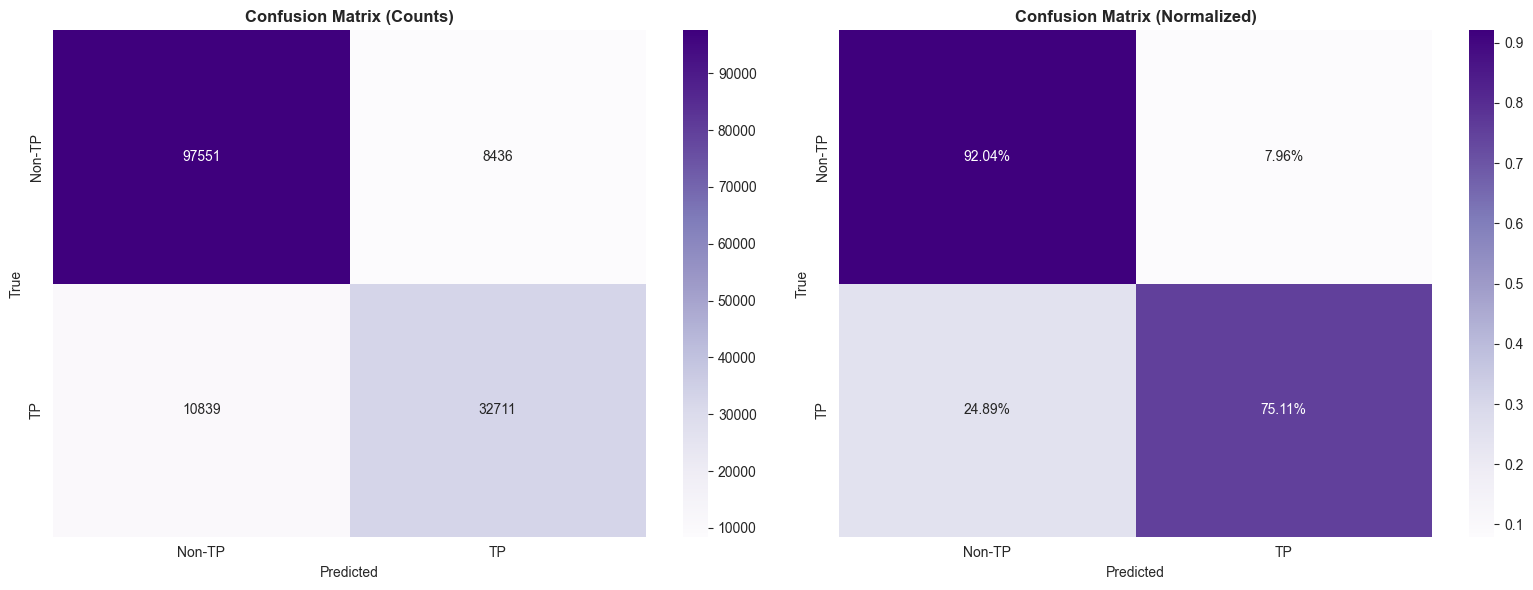

In [5]:
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Non-TP', 'TP'],
            yticklabels=['Non-TP', 'TP'], ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')
axes[0].set_ylabel('True')
axes[0].set_xlabel('Predicted')

sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Purples',
            xticklabels=['Non-TP', 'TP'],
            yticklabels=['Non-TP', 'TP'], ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')
axes[1].set_ylabel('True')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## 6. ROC Curve

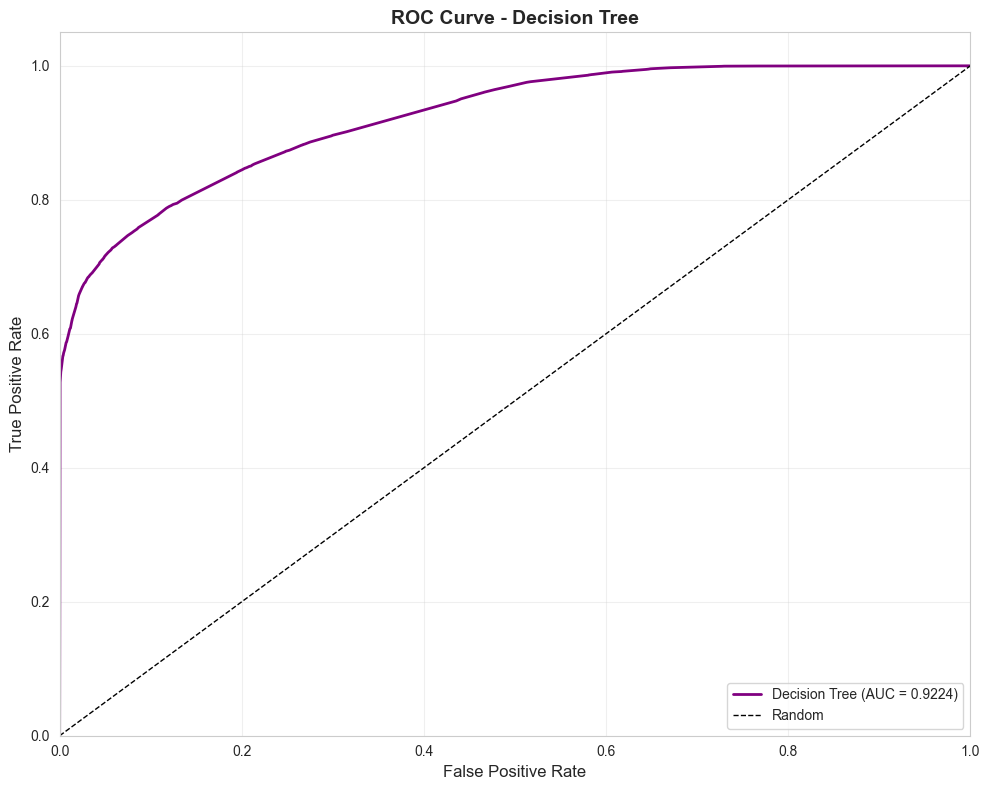

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Decision Tree (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Decision Tree', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Feature Importance

In [7]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Filtra solo feature usate (importance > 0)
feature_importance_used = feature_importance[feature_importance['Importance'] > 0]

print(f"Features utilizzate nell'albero: {len(feature_importance_used)} su {len(feature_importance)}")
print("\nTop Features:")
print(feature_importance_used.head(20).to_string(index=False))

Features utilizzate nell'albero: 24 su 43

Top Features:
                      Feature  Importance
              Roles_freq_mean    0.404675
             SmoothedRisk_avg    0.306287
              GeoLoc_freq_avg    0.082064
       ResourceType_freq_mean    0.081613
        LastVerdict_freq_mean    0.064444
           Category_freq_mean    0.026508
             Duration_seconds    0.010311
                    T1078_sum    0.004993
                 NumEvidences    0.003759
         EntityType_freq_mean    0.003539
                    NumAlerts    0.003128
   SuspicionLevel_Missing_sum    0.002399
             weekday_get_mode    0.001384
                IsWeekend_max    0.000848
SuspicionLevel_Suspicious_sum    0.000769
                    T1566_sum    0.000731
     EvidenceRole_Related_sum    0.000683
                    Hour_Last    0.000532
  AntispamDirection_freq_mean    0.000492
                   Hour_First    0.000312


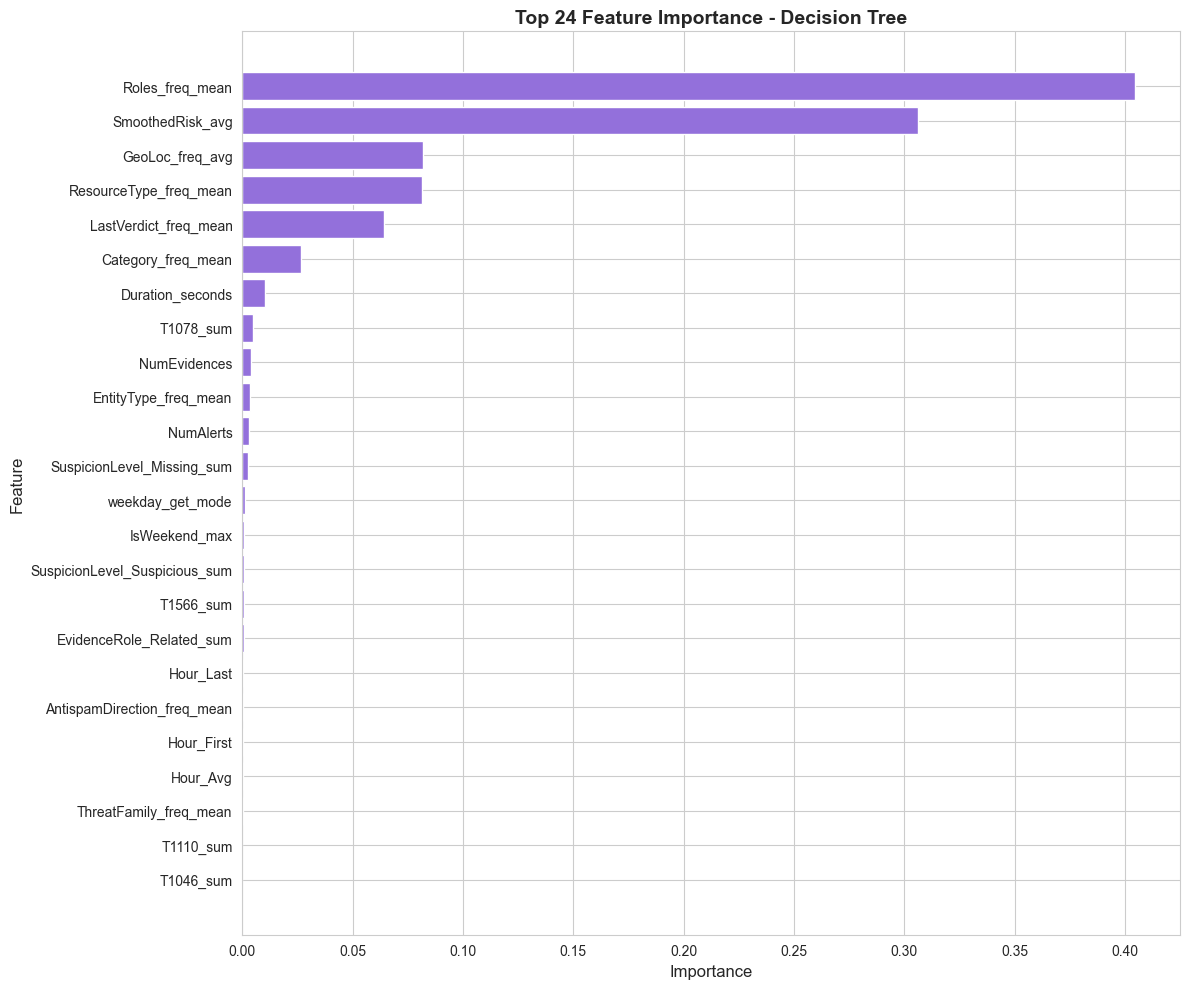

In [8]:
plt.figure(figsize=(12, 10))
top_n = min(25, len(feature_importance_used))
top_features = feature_importance_used.head(top_n)

plt.barh(range(top_n), top_features['Importance'], color='mediumpurple')
plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title(f'Top {top_n} Feature Importance - Decision Tree',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Tree Visualization (Top 3 Levels)

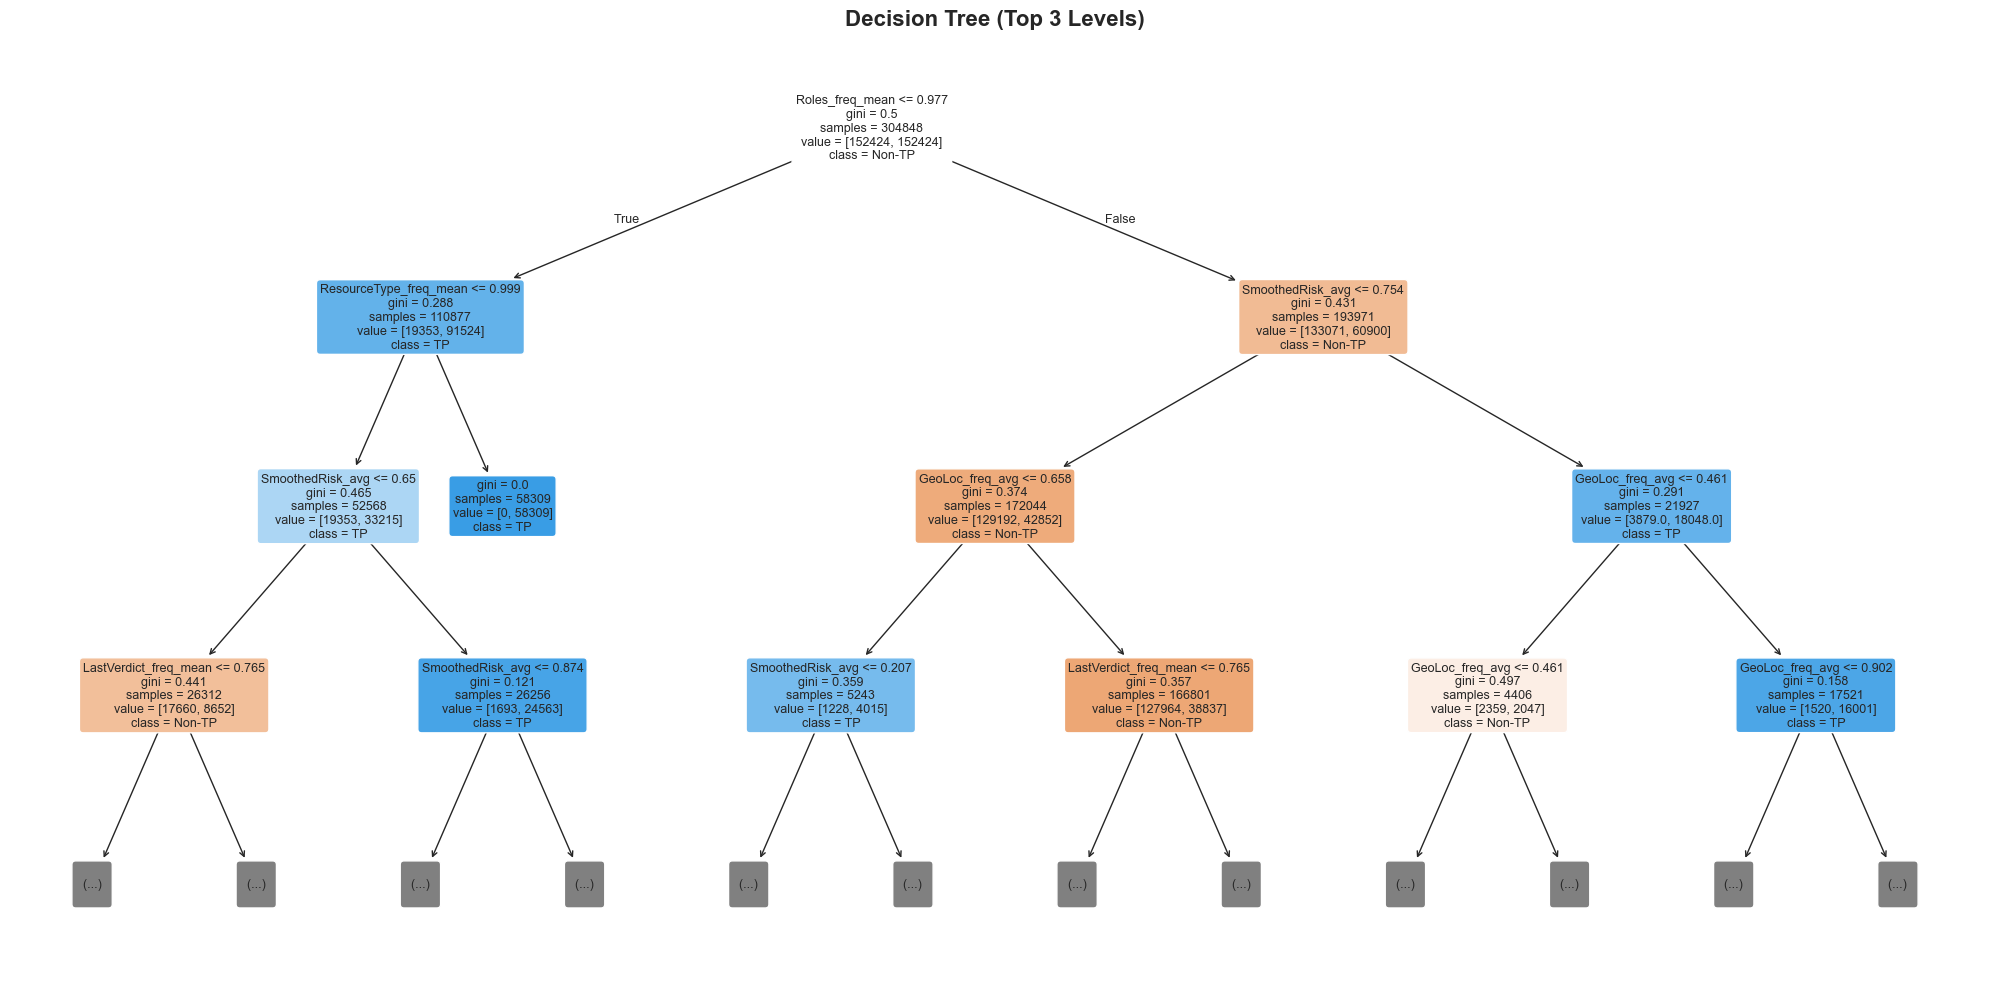

⚠️ Nota: Visualizzati solo i primi 3 livelli per leggibilità
   Albero completo ha profondità 10


In [9]:
# Visualizza solo i primi 3 livelli (albero completo è troppo grande)
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    max_depth=3,
    feature_names=X_train.columns,
    class_names=['Non-TP', 'TP'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title('Decision Tree (Top 3 Levels)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("⚠️ Nota: Visualizzati solo i primi 3 livelli per leggibilità")
print(f"   Albero completo ha profondità {model.get_depth()}")

## Summary

**Decision Tree:** Singolo albero decisionale

**Bilanciamento:** `class_weight='balanced'` + pruning (max_depth, min_samples)

**Vantaggi:**
- ✅ **Massima interpretabilità** - Visualizzabile e spiegabile
- ✅ Nessun preprocessing necessario
- ✅ Gestisce feature categoriche naturalmente
- ✅ Velocissimo in training e predict
- ✅ Feature importance chiara

**Svantaggi:**
- ⚠️ Alto rischio overfitting (mitigato con pruning)
- ⚠️ Instabile (piccole variazioni dati → albero diverso)
- ⚠️ Bias verso feature ad alta cardinalità

**Quando usare Decision Tree:**
- Priorità interpretabilità
- Baseline veloce
- Feature selection (vedi importance)
- Regole decisionali esplicite necessarie

**Hyperparameters chiave:**
- `max_depth`: Profondità massima (↓ = meno overfitting)
- `min_samples_split/leaf`: Regolarizzazione (↑ = più generalizzazione)
- `class_weight`: Bilanciamento classi

In [11]:
import os
import json
import pickle
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crea directory per il modello
model_dir = '../models/decision_tree'
os.makedirs(model_dir, exist_ok=True)

# Salva modello DecisionTree con pickle
model_path = f'{model_dir}/model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)
print(f"✅ Modello salvato: {model_path}")

# Salva feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance.to_csv(f'{model_dir}/feature_importance.csv', index=False)
print(f"✅ Feature importance salvato: {model_dir}/feature_importance.csv")

# Calcola metriche
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

cm = confusion_matrix(y_test, y_pred)

# Salva metriche
metrics = {
    "model_name": "DecisionTree",
    "timestamp": datetime.now().isoformat(),
    "dataset_version": "processed_v3",
    "test_accuracy": float(accuracy_score(y_test, y_pred)),
    "test_precision": float(precision_1),
    "test_recall": float(recall_1),
    "test_f1_score": float(f1_1),
    "test_roc_auc": float(roc_auc_score(y_test, y_pred_proba[:, 1])),
    "n_features": X_train.shape[1],
    "n_train_samples": len(X_train),
    "n_test_samples": len(X_test),
    "tree_depth": int(model.get_depth()),
    "n_leaves": int(model.get_n_leaves()),
    "class_distribution_train": {
        "class_0": int((y_train == 0).sum()),
        "class_1": int((y_train == 1).sum())
    },
    "per_class_metrics": {
        "class_0_non_tp": {
            "precision": float(precision_0),
            "recall": float(recall_0),
            "f1_score": float(f1_0)
        },
        "class_1_tp": {
            "precision": float(precision_1),
            "recall": float(recall_1),
            "f1_score": float(f1_1)
        }
    },
    "confusion_matrix": {
        "true_negatives": int(cm[0, 0]),
        "false_positives": int(cm[0, 1]),
        "false_negatives": int(cm[1, 0]),
        "true_positives": int(cm[1, 1])
    },
    "hyperparameters": {
        "max_depth": model.max_depth,
        "min_samples_split": model.min_samples_split,
        "min_samples_leaf": model.min_samples_leaf,
        "max_features": model.max_features,
        "class_weight": str(model.class_weight),
        "criterion": model.criterion
    },
    "top_10_features": feature_importance.head(10).to_dict('records')
}

with open(f'{model_dir}/metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)

print(f"✅ Metriche salvate: {model_dir}/metrics.json")

print(f"\n{'='*60}")
print("RIEPILOGO SALVATAGGIO")
print(f"{'='*60}")
print(f"Directory: {model_dir}")
print(f"  - model.pkl")
print(f"  - feature_importance.csv")
print(f"  - metrics.json")
print(f"  Tree depth: {model.get_depth()}")
print(f"  Number of leaves: {model.get_n_leaves()}")
print(f"{'='*60}")

✅ Modello salvato: ../models/decision_tree/model.pkl
✅ Feature importance salvato: ../models/decision_tree/feature_importance.csv
✅ Metriche salvate: ../models/decision_tree/metrics.json

RIEPILOGO SALVATAGGIO
Directory: ../models/decision_tree
  - model.pkl
  - feature_importance.csv
  - metrics.json
  Tree depth: 10
  Number of leaves: 366


## 9. Salvataggio Modello e Metriche